In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cvae/keras/default/1/convolutional_cvae_model.h5
/kaggle/input/cvae/keras/default/1/cvae.weights.h5
/kaggle/input/cvae-training/cvae_0-50.txt


In [2]:
%pwd

'/kaggle/working'

In [3]:
os.chdir("..")

In [4]:
import re

In [5]:
# Define file path
file_path = "input/cvae-training/cvae_0-50.txt"

# Initialize lists
kl_losses, losses, reconstruction_losses= [], [], []

# Regular expression to extract values
pattern = re.compile(r"kl_loss: ([\de\.\-]+) - loss: ([\de\.\-]+) - reconstruction_loss: ([\de\.\-]+) ")

# Read file and extract data
with open(file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            kl_loss, loss, reconstruction_loss= map(float, match.groups())
            kl_losses.append(kl_loss)
            losses.append(loss)
            reconstruction_losses.append(reconstruction_loss)
            #val_kl_losses.append(val_kl_loss)
            #val_reconstruction_losses.append(val_reconstruction_loss)
            #val_total_losses.append(val_total_loss)

In [6]:
kl_losses

[0.0419,
 3.3798e-05,
 1.0567e-05,
 6.2292e-06,
 1.2992e-06,
 7.5882e-07,
 6.9933e-07,
 6.802e-07,
 6.6978e-07,
 7.4324e-07,
 6.1108e-07,
 5.1677e-07,
 4.7154e-07,
 4.3283e-07,
 3.9633e-07,
 3.7767e-07,
 3.6917e-07,
 3.8218e-07,
 3.5313e-07,
 3.4568e-07,
 3.9447e-07,
 3.662e-07,
 2.8744e-07,
 3.3659e-07,
 2.5063e-07,
 3.0336e-07,
 3.1775e-07,
 3.097e-07,
 2.5437e-07,
 3.0271e-07,
 3.5565e-07,
 2.9262e-07,
 3.4906e-07,
 3.7386e-07,
 3.0479e-07,
 2.9548e-07,
 2.6213e-07,
 3.1129e-07,
 3.5612e-07,
 2.7434e-07,
 2.9827e-07,
 2.8519e-07,
 2.9199e-07,
 3.3171e-07,
 3.1965e-07,
 3.2007e-07,
 3.0329e-07,
 2.4762e-07,
 3.0765e-07,
 2.5388e-07]

In [7]:
len(kl_losses), len(losses), len(reconstruction_losses)

(50, 50, 50)

In [8]:
import matplotlib.pyplot as plt

In [9]:
epochs = range(1, len(losses) + 1)

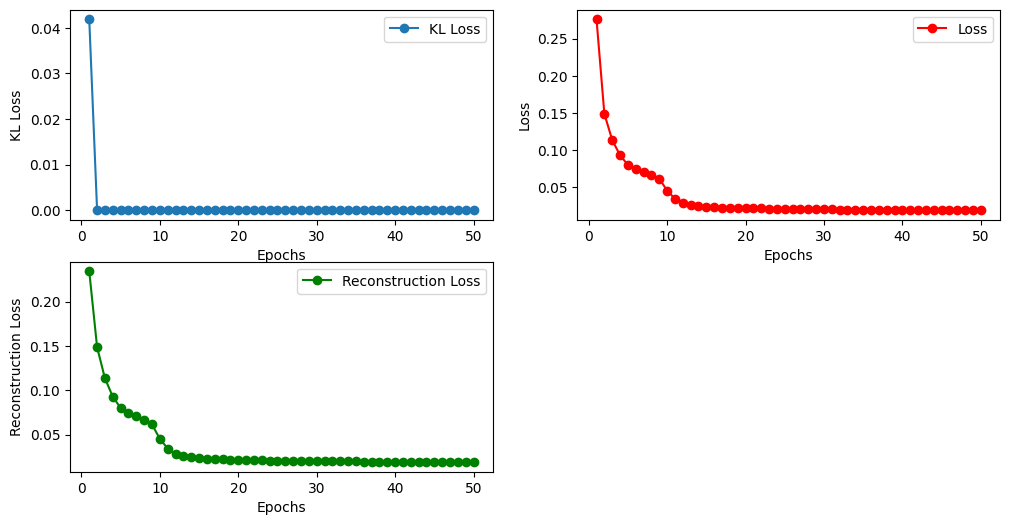

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(epochs, kl_losses, label="KL Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("KL Loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, losses, label="Loss", marker="o", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, reconstruction_losses, label="Reconstruction Loss", marker="o", color="green")
plt.xlabel("Epochs")
plt.ylabel("Reconstruction Loss")
plt.legend()

In [12]:
from scipy.signal import savgol_filter
# Apply Savitzky-Golay filter for smoothing (window size=9, polynomial order=3)
def smooth_curve(y, window=9, poly=3):
    return savgol_filter(y, window, poly) if len(y) > window else y

kl_losses_smooth = smooth_curve(kl_losses)
losses_smooth = smooth_curve(losses)
reconstruction_losses_smooth = smooth_curve(reconstruction_losses)



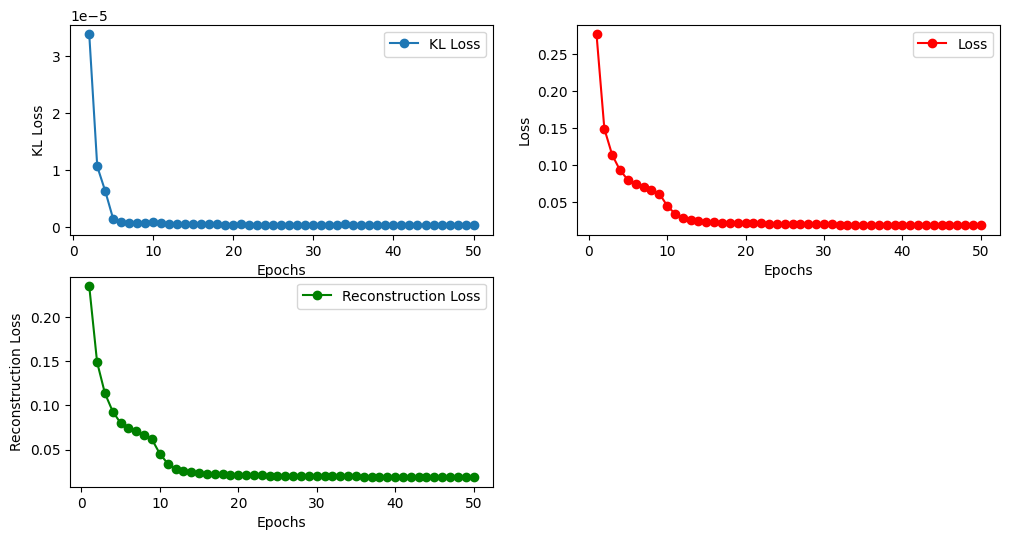

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(epochs[1:], kl_losses[1:], label="KL Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("KL Loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, losses, label="Loss", marker="o", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, reconstruction_losses, label="Reconstruction Loss", marker="o", color="green")
plt.xlabel("Epochs")
plt.ylabel("Reconstruction Loss")
plt.legend()